In [66]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict as odict

In [77]:
import gzip, cPickle
snFits = cPickle.load(gzip.GzipFile('snFits.p.gz'))
print len(snFits)
snf = [s for s in snFits.values() if s is not None]
print len(snf)

1622
1549


/Users/dreiss/Desktop/Pre_MAP/store/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/Users/dreiss/Desktop/Pre_MAP/store/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/Users/dreiss/Desktop/Pre_MAP/store/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/Users/dreiss/Desktop/Pre_MAP/store/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/Users/dreiss/Desktop/Pre_MAP/store/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Users/dreiss/Desktop/Pre_MAP/store/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less
/Users/dreiss/Desktop/Pre_MAP/store/miniconda/lib/python2.7/site-packages/ipykernel/__main_

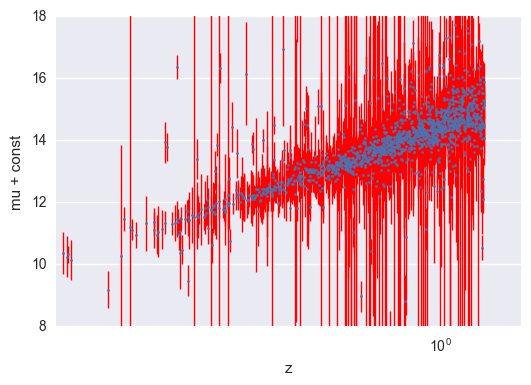

In [74]:
z = np.array([s.z for s in snf])
mu = np.array([s.mu for s in snf])

mu_var = mu.copy() #np.array([s.mu_var for s in snf])
for i,s in enumerate(snf):
    try:
        mu_var[i] = s.mu_var
    except:
        mu_var[i] = 999

# Here, we didn't fit z so zz and z will be identical.
zz = z.copy() #np.array([s['inputParams'].get('z') for s in snf]) 
for i,s in enumerate(snf):
    try:
        zz[i] = s['inputParams'].get('z')
    except:
        zz[i] = 999

z = z[(mu > 0) & (mu < 19)]
zz = zz[(mu > 0) & (mu < 19)]
mu = mu[(mu > 0) & (mu < 19)]
mu_var = mu_var[(mu > 0) & (mu < 19)]
#plt.scatter(z, mu)
plt.errorbar(z, mu, yerr=np.sqrt(mu_var), fmt='o', ecolor='r', elinewidth=1, ms=2)
plt.xlabel('z')
plt.xscale('log')
plt.ylabel('mu + const')
plt.xlim((0.2,1.4))
plt.ylim((8,18));